# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

## Read data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/depi/datasets/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea


In [ ]:
df.shape

(374, 13)

1- How many male and female in the data ?

In [ ]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [ ]:
df['Age'].min()

27

In [ ]:
df['Age'].max()

59

In [ ]:
range = df['Age'].max() - df['Age'].min()
range

32

2- how many people are in each occupation ?

In [ ]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                62
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [ ]:
df['Occupation'].value_counts().max()

73

3- get the average of sleep hours for each occupation

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].replace(np.nan, 'No')

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,No
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,No
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,No
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea


In [ ]:
# Deal with null values
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
df['Sleep Duration'].groupby(df['Occupation']).mean()

Occupation
Accountant              7.113889
Doctor                  6.970423
Engineer                7.979032
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.048611
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       7.033333
Teacher                 6.690000
Name: Sleep Duration, dtype: float64

In [ ]:
df['Physical Activity Level'].groupby(df['Occupation']).mean()

Occupation
Accountant              58.055556
Doctor                  55.352113
Engineer                52.209677
Lawyer                  70.425532
Manager                 55.000000
Nurse                   78.638889
Sales Representative    30.000000
Salesperson             45.000000
Scientist               41.000000
Software Engineer       54.000000
Teacher                 45.625000
Name: Physical Activity Level, dtype: float64

In [ ]:
df2 = df[['Gender', 'Stress Level']]
df2

,Gender,Stress Level
0,Male,6
1,Male,8
2,Male,8
3,Male,8
4,Male,8
...,...,...
368,Female,3
369,Female,3
370,Female,3
371,Female,3


In [ ]:
df2.groupby('Gender').mean()

,Stress Level
Gender,
Female,4.697802
Male,6.069149


## Data preprocessing

In [ ]:
df.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
93,94,Male,35,Lawyer,7.4,7,60,5,Obese,135/88,84.0,3300,Sleep Apnea
50,51,Male,32,Engineer,7.5,8,45,3,Normal,120/80,70.0,8000,No
109,110,Male,37,Lawyer,7.4,8,60,5,Normal,130/85,68.0,8000,No
62,63,Male,32,Doctor,6.2,6,30,8,Normal,125/80,72.0,5000,No
196,197,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72.0,6000,Insomnia
228,229,Female,44,Teacher,6.6,7,45,4,Overweight,135/90,65.0,6000,Insomnia
356,357,Female,58,Nurse,8.0,9,75,3,Overweight,140/95,68.0,7000,Sleep Apnea
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68.0,7000,No
210,211,Male,43,Engineer,7.7,8,90,5,Normal,130/85,70.0,8000,No
124,125,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68.0,7000,No


In [ ]:
def splitting_data(bp):
    bp = bp.split('/')
    return int(bp[0])

In [ ]:
df['high Pressure'] = df['Blood Pressure'].apply(splitting_data)

In [ ]:
def splitting_data(bp):
    bp = bp.split('/')
    return int(bp[1])

In [ ]:
df['low Pressure'] = df['Blood Pressure'].apply(splitting_data)

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,high Pressure,low Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200,No,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,No,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000,No,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000,Sleep Apnea,140,90


In [ ]:
df.drop(columns=['Blood Pressure','Person ID'], axis=1, inplace =True)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,high Pressure,low Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,No,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,No,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,No,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85.0,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85.0,3000,Sleep Apnea,140,90


## Check for duplicates

In [ ]:
df.duplicated().sum()

239

## Check for ouliers

Text(0.5, 1.0, 'low Pressure')

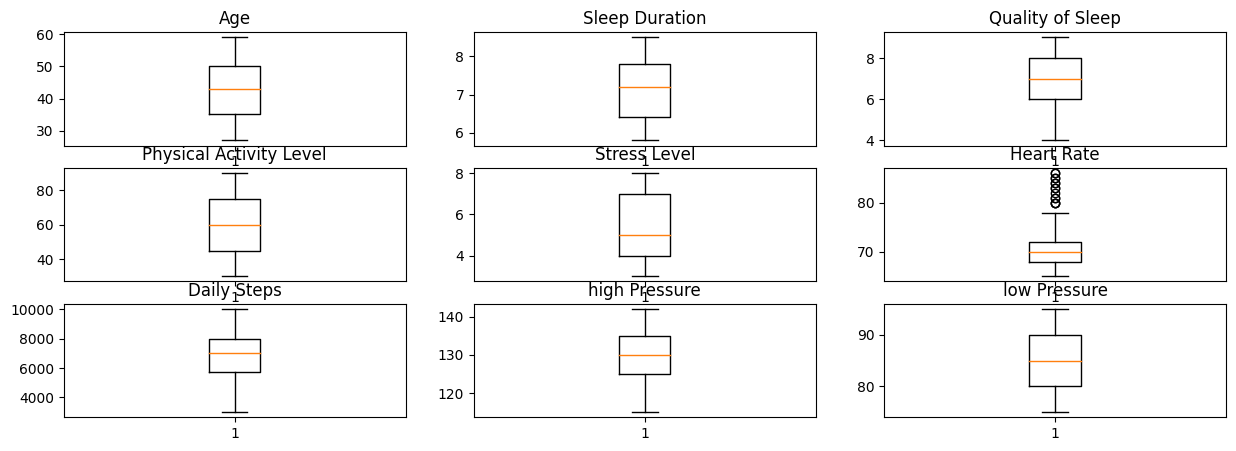

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(15,5))
ax[0,0].boxplot(df['Age'])
ax[0,0].set_title("Age")
ax[0,1].boxplot(df['Sleep Duration'])
ax[0,1].set_title("Sleep Duration")
ax[0,2].boxplot(df['Quality of Sleep'])
ax[0,2].set_title("Quality of Sleep")

ax[1,0].boxplot(df['Physical Activity Level'])
ax[1,0].set_title("Physical Activity Level")
ax[1,1].boxplot(df['Stress Level'])
ax[1,1].set_title("Stress Level")
ax[1,2].boxplot(df['Heart Rate'])
ax[1,2].set_title("Heart Rate")

ax[2,0].boxplot(df['Daily Steps'])
ax[2,0].set_title("Daily Steps")
ax[2,1].boxplot(df['high Pressure'])
ax[2,1].set_title("high Pressure")
ax[2,2].boxplot(df['low Pressure'])
ax[2,2].set_title("low Pressure")

In [ ]:
def handle_outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    return lower_limit, upper_limit

In [ ]:
l,u = handle_outlier(df['Heart Rate'])
df.drop(df[(df['Heart Rate'] < l) | (df['Heart Rate'] > u)].index,inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(356, 13)

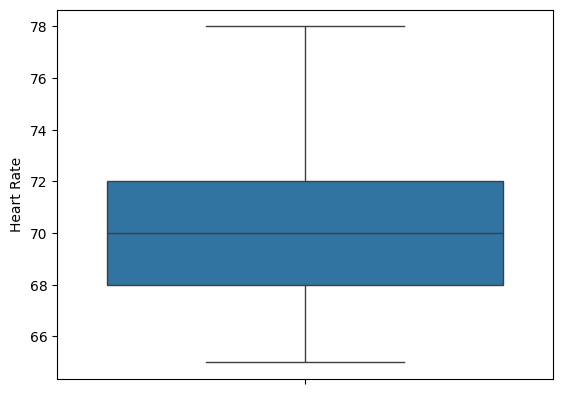

In [ ]:
sns.boxplot(df['Heart Rate'])
plt.show()

## Encoding categorical data

### Check unique values

In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Normal Weight'], dtype=object)

In [ ]:
df.loc[df['BMI Category'] == 'Normal Weight', 'BMI Category'] = 'Normal'

In [ ]:
df.loc[df['BMI Category'] == 'Obese', 'BMI Category'] = 'Overweight'

In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal'], dtype=object)

In [ ]:
df['Sleep Disorder'].unique()

array(['No', 'Sleep Apnea', 'Insomnia'], dtype=object)

### Encoding

In [ ]:
# df = pd.get_dummies(df,columns=['Occupation', 'BMI Category'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_o = LabelEncoder()
df['Occupation'] = le_o.fit_transform(df['Occupation'])
le_b = LabelEncoder()
df['BMI Category'] = le_b.fit_transform(df['BMI Category'])

In [ ]:
le_g = LabelEncoder()
df['Gender'] = le_g.fit_transform(df['Gender'])
le_s = LabelEncoder()
df['Sleep Disorder'] = le_s.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,high Pressure,low Pressure
0,1,27,8,6.1,6,42,6,1,77.0,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75.0,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75.0,10000,1,125,80
3,1,29,1,7.8,7,75,6,0,70.0,8000,1,120,80
4,1,29,1,7.8,7,75,6,0,70.0,8000,1,120,80


In [ ]:
df['Sleep Disorder'].unique()

array([1, 2, 0])

## Scaling

In [ ]:
# Split data
x = df.drop("Sleep Disorder", axis=1)
y = df.iloc[:,10:11]

In [ ]:
y

,Sleep Disorder
0,1
1,1
2,1
3,1
4,1
...,...
351,2
352,2
353,2
354,2


In [ ]:
scaler_x = MinMaxScaler()
x = scaler_x.fit_transform(x)

## Irrelevant data

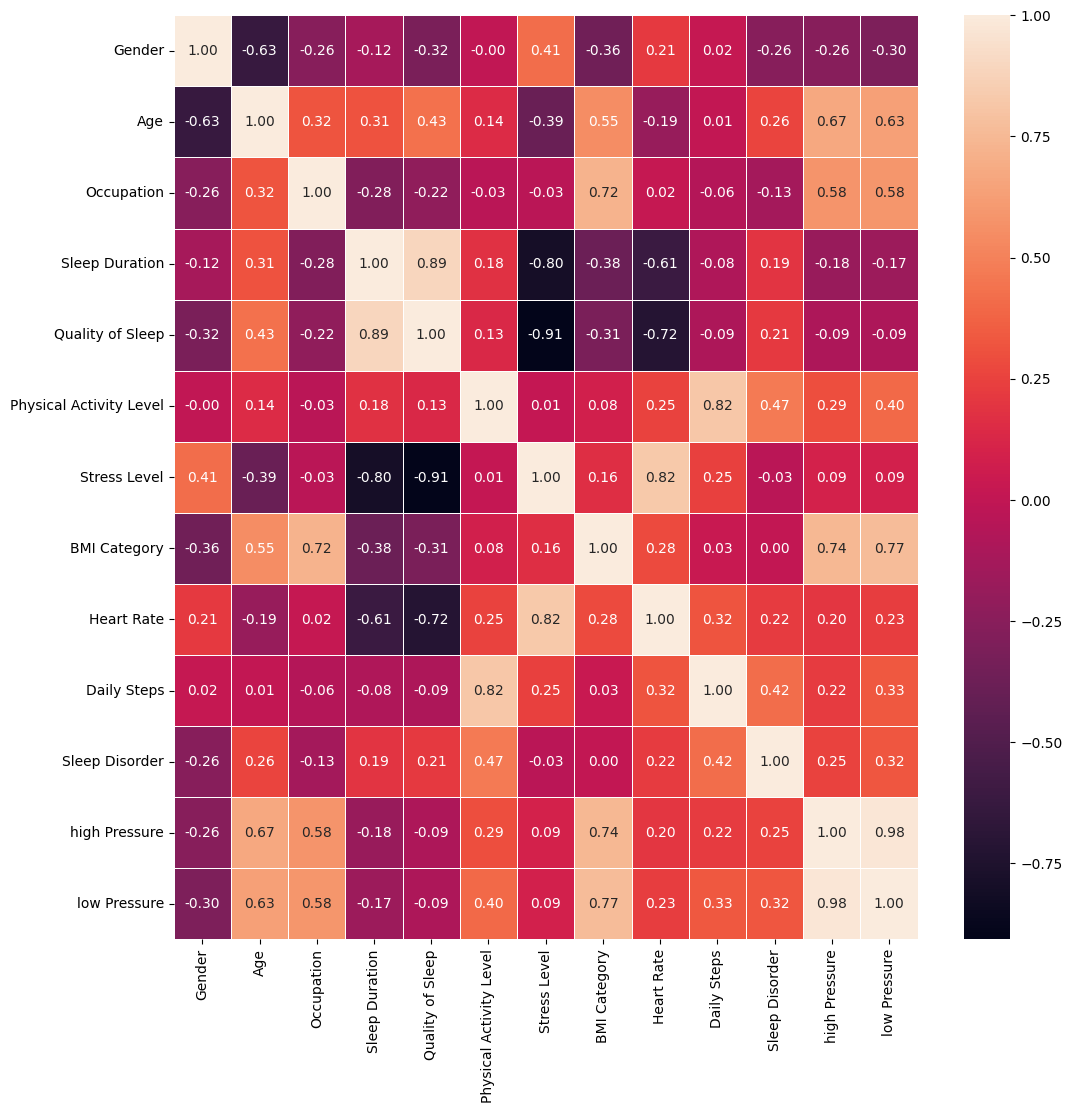

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.show()

## Model

In [ ]:
# Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
y_train

,Sleep Disorder
39,1
235,0
49,1
218,0
236,1
...,...
99,1
42,1
179,0
213,0


In [ ]:
# Model
model= svm.SVC(kernel='linear', C = 1.0)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
print(f"Test Accuracy : {100 * model.score(x_test,y_test)}%")

Test Accuracy : 88.88888888888889%


In [ ]:
print(f"Train Accuracy : {100 * model.score(x_train,y_train)}%")

Train Accuracy : 91.54929577464789%
